In [23]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import sklearn
import fastcluster
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
plt.rcParams.update(plt.rcParamsDefault)

### Preparazione del dataset

In [3]:

df = pd.read_csv("ridotto.csv")
#del df['credit_default']
del df['sex']
del df['education']
del df['status']
del df['age']
del df['ps-sep']

df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:3].values)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Hierarchical Clustering

In [5]:
## Funzione che usiamo per disegnare dendogrammi decenti

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram ')
        plt.xlabel('distance')
        plt.ylabel('sample index or (cluster size)')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axvline(x=max_d, c='k')
    return ddata

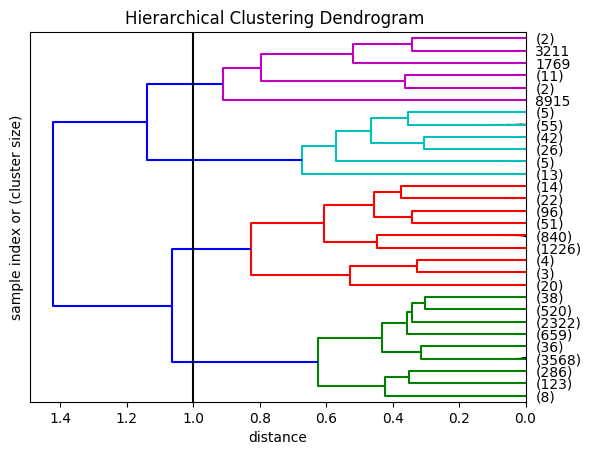

In [26]:
data_dist = pdist(X, metric='euclidean')
# Generazione della matrice linkage
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp',leaf_rotation=0, orientation='left',show_leaf_counts=True, show_contracted=True,max_d=1, annotate_above=10)

# Sull'asse delle X abbiamo le distanze, sull'asse delle X sono gli indici dei sample dei dati

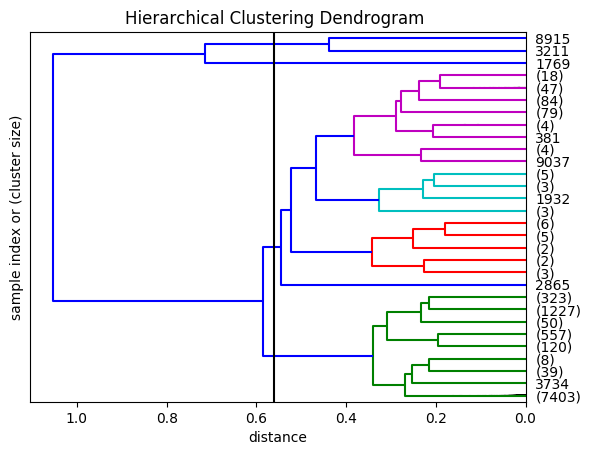

In [27]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=0.56, annotate_above=10)

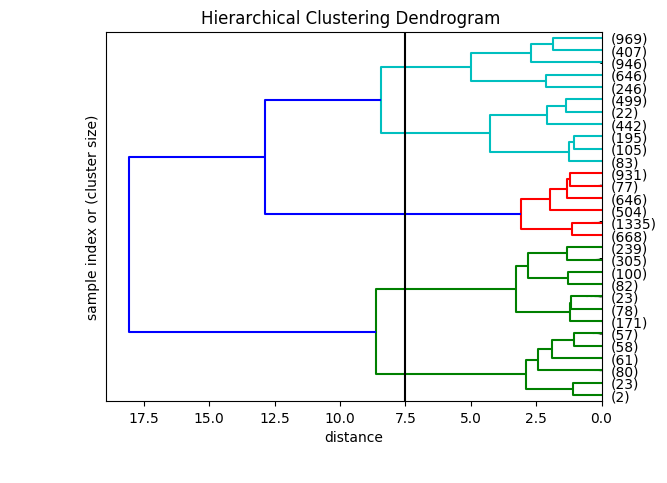

In [28]:
data_dist = pdist(X, metric='euclidean')
# Ward è il metodo che utilizziamo per misurare la distanza tra i cluster appena creati
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=10, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=7.5, annotate_above=10)

### Valutazione dei cluster

##### Complete

In [12]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, complete.labels_)

Numero Cluster:  2
Cluster {0: 164, 1: 9836}
Silhouette Score 0.6277084803056014
Numero Cluster:  3
Cluster {0: 9836, 1: 18, 2: 146}
Silhouette Score 0.6214374732648321
Numero Cluster:  4
Cluster {0: 18, 1: 2276, 2: 146, 3: 7560}
Silhouette Score 0.4988378742544621
Numero Cluster:  5
Cluster {0: 2276, 1: 17, 2: 146, 3: 7560, 4: 1}
Silhouette Score 0.4986466522074219
Numero Cluster:  6
Cluster {0: 17, 1: 7560, 2: 146, 3: 2249, 4: 1, 5: 27}
Silhouette Score 0.47783909439488553
Numero Cluster:  7
Cluster {0: 146, 1: 7560, 2: 27, 3: 2249, 4: 1, 5: 4, 6: 13}
Silhouette Score 0.4775529257209033
Numero Cluster:  8
Cluster {0: 7560, 1: 2249, 2: 27, 3: 133, 4: 1, 5: 4, 6: 13, 7: 13}
Silhouette Score 0.4732047975217086
Numero Cluster:  9
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 13, 8: 417}
Silhouette Score 0.4801567475046634


##### Average

In [13]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    average = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean', connectivity=connectivity)
    average.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(average.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, average.labels_)

Numero Cluster:  2
Cluster {0: 2249, 1: 160}
Silhouette Score 0.7720085810423728
Numero Cluster:  3
Cluster {0: 2249, 1: 133, 2: 7170}
Silhouette Score 0.7323805792911509
Numero Cluster:  4
Cluster {0: 2249, 1: 133, 2: 27, 3: 7144}
Silhouette Score 0.6067657069185207
Numero Cluster:  5
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 5}
Silhouette Score 0.6022980550599847
Numero Cluster:  6
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 17}
Silhouette Score 0.5984783630205602
Numero Cluster:  7
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 26}
Silhouette Score 0.5847679198730995
Numero Cluster:  8
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 430}
Silhouette Score 0.5846274171218605
Numero Cluster:  9
Cluster {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 13, 8: 417}
Silhouette Score 0.5803585067076326


##### Ward

In [14]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None

for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean', connectivity=connectivity)
    ward.fit(X)
    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, ward.labels_)

Numero Cluster:  2
Cluster {0: 8721, 1: 1279}
Silhouette Score 0.5511754624661784
Numero Cluster:  3
Cluster {0: 1279, 1: 4560, 2: 4161}
Silhouette Score 0.41461217416233886
Numero Cluster:  4
Cluster {0: 4560, 1: 998, 2: 4161, 3: 281}
Silhouette Score 0.41955293673662536
Numero Cluster:  5
Cluster {0: 3214, 1: 1346, 2: 4161, 3: 281, 4: 998}
Silhouette Score 0.4883216157588073
Numero Cluster:  6
Cluster {0: 1346, 1: 998, 2: 4161, 3: 281, 4: 2322, 5: 892}
Silhouette Score 0.4515661810833612
Numero Cluster:  7
Cluster {0: 998, 1: 281, 2: 4161, 3: 963, 4: 2322, 5: 892, 6: 383}
Silhouette Score 0.4467998522956019
Numero Cluster:  8
Cluster {0: 4161, 1: 281, 2: 726, 3: 963, 4: 2322, 5: 892, 6: 383, 7: 272}
Silhouette Score 0.44944151581802255
Numero Cluster:  9
Cluster {0: 281, 1: 2322, 2: 726, 3: 963, 4: 2158, 5: 892, 6: 383, 7: 272, 8: 2003}
Silhouette Score 0.3515018263038154
